# Mid-long term forecast

As such, Electricity Price Forecasting (EPF) has become a problem of increasing complexity due to various factors such as the transformation of the energy sector and geopolitical challenges in the power industry. The mid and long term forecast is quite a challenging but also beneficial for the stakeholders problem. However, the complexity along with the variation of the indicators used in short term forecast, are bottleneckfor an accurate forecast. In the current mid term approach, the original dataset has been tranformed, in order to capture the monthly trend in terms of load, while the stock market prices, have been shifted weekly. Actually, the whole input x, at time t targets to y, at time t+168, which is a weekly period.  This happened due to the poor performance of the short term models. The initial approach was to shift towards the past, future prices, in order to connect input x with output y+t. However, due to the aforementioned limitations, the results were even more worse. So, in that way we are trying to capture the overall trend of the electricity price and how the various exogenous factors can affect the market, such as increase in ttf. 
The different algorithms have been trained and evaluated with the same method as short term forecasters.

For the long term forecast, two algorithms have been deployed, ARIMA with various variants and Ridge autoregressor, with and without exogenous factors included. The way that these models are tested is altered compared to the previous approaches. In more details, we followed a walk-forward validation. Initially, following the method 1 or 2, used before the dataset is splitted. Next, reccursively test using the training dataset, which updates at each next time step. At each step t, after the training step, the last actual test point, is included in the training dataset. This allows the simulation of how the model would perform in a real-world scenario where new data is continuously becoming available. 
Additionally, they were trained including exogenous factors, such as the loads and the stock prices from the original dataset. However, due to their computational expense they weren't evaluated for the whole dataset, but their performance over a specific period of time: step, is plotted. Especially, ARIMA with exogenous factors required almost 2 minutes for only one training step-1 hour.

Additionally, it is noteworthy that ARIMA was tested in an hourly dataset, which means that for each hour of the day, a different ARIMA model was trained.





# Orders of the various arima models

model arima with/without exogenous

order 8,0,1  

model arima hourly without exogenous

order_p/hour [4, 4, 4, 3, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 3, 2, 6, 6, 4, 4, 6]

order_q/hour [1, 1, 3, 1, 1, 3, 4, 4, 5, 6, 3, 5, 5, 6, 3, 3, 6, 4, 2, 0, 1, 1, 2, 3]

In [116]:
%%capture
%load_ext autoreload
%autoreload all
from helper_mid import *
from time_analysis import *
%autoreload
%aimport helper_mid

from __init__ import root_dir, data_path



In [27]:
import os
%%capture

UsageError: Line magic function `%%capture` not found.


In [28]:

df_clean = pd.read_csv(os.path.join(data_path,'clean.csv'), parse_dates=['Timestamp'])
datam=load_data(df_clean)
data_m=split(datam)
data_m=data_m[144:-284]# the dataset for mid term forecasting
df_lagged=data_m.copy()
df_lagged

Timestamp  Day_Ahead_price  ttf_price  coal_price  co2_price  \
144   2018-01-09 00:00:00            27.17  19.434999      107.00       8.19   
145   2018-01-09 01:00:00            22.10  19.434999      107.00       8.19   
146   2018-01-09 02:00:00             9.79  19.434999      107.00       8.19   
147   2018-01-09 03:00:00             4.99  19.434999      107.00       8.19   
148   2018-01-09 04:00:00             9.24  19.434999      107.00       8.19   
...                   ...              ...        ...         ...        ...   
39716 2023-04-15 20:00:00            50.01  41.148998      194.15      79.40   
39717 2023-04-15 21:00:00            50.01  41.148998      194.15      79.40   
39718 2023-04-15 22:00:00            50.01  41.148998      194.15      79.40   
39719 2023-04-15 23:00:00            50.01  41.148998      194.15      79.40   
39720 2023-04-16 00:00:00            50.01  41.148998      194.15      79.40   

       Hour        Date  Weekday  business  DK_1_imports_mean4  \
144       0  2018-01-09        1      True               383.0   
145       1  2018-01-09        1      True               589.0   
146       2  2018-01-09        1      True               557.0   
147       3  2018-01-09        1      True               487.0   
148       4  2018-01-09        1      True               580.0   
...     ...         ...      ...       ...                 ...   
39716    20  2023-04-15        5     False                 0.0   
39717    21  2023-04-15        5     False                 0.0   
39718    22  2023-04-15        5     False                 0.0   
39719    23  2023-04-15        5     False                 0.0   
39720     0  2023-04-15        6     False                 0.0   

       SE_4_imports_mean4  DK_1_exports_mean4  SE_4_exports_mean4  \
144                  0.00                0.00               808.0   
145                  0.00                0.00              1019.0   
146                  0.00                0.00               926.0   
147                  0.00                0.00               784.0   
148                  0.00                0.00               756.0   
...                   ...                 ...                 ...   
39716             1087.75              374.50                 0.0   
39717             1094.25              393.50                 0.0   
39718             1014.75              420.50                 0.0   
39719              924.75              405.75                 0.0   
39720              829.00              339.25                 0.0   

       Actual_Load_mean4  Solar_[MW]_mean4  DE_LU_AT_imports_mean4  \
144              1245.00               0.0                  600.00   
145              1203.00               0.0                  600.00   
146              1178.00               0.0                  600.00   
147              1180.00               0.0                  600.00   
148              1247.00               0.0                  600.00   
...                  ...               ...                     ...   
39716            1506.50               0.0                    1.00   
39717            1435.00               0.0                    0.00   
39718            1380.00               0.0                    7.00   
39719            1323.75               0.0                  255.25   
39720            1307.75               0.0                  370.00   

       DE_LU_AT_exports_mean4  Wind Total_mean4  
144                      0.00            429.00  
145                      0.00            375.00  
146                      0.00            313.00  
147                      0.00            229.00  
148                      0.00            175.00  
...                       ...               ...  
39716                 2012.50            583.00  
39717                 2062.25            578.25  
39718                 1689.50            555.25  
39719                 1759.50            583.00  
39720                 1786.75            5

In [25]:
data_m.isna().sum()

Timestamp                 0
Day_Ahead_price           0
ttf_price                 0
coal_price                0
co2_price                 0
Hour                      0
Date                      0
Weekday                   0
business                  0
DK_1_imports_mean4        0
SE_4_imports_mean4        0
DK_1_exports_mean4        0
SE_4_exports_mean4        0
Actual_Load_mean4         0
Solar_[MW]_mean4          0
DE_LU_AT_imports_mean4    0
DE_LU_AT_exports_mean4    0
Wind Total_mean4          0
dtype: int64

In [29]:
# setting up splits for training
train_start = pd.to_datetime(['2018-01-09', '2021-01-01', '2021-08-01'], format = '%Y-%m-%d')
k_folds = len(train_start)

# Data-transformation for mid term

In [30]:
# setting up features and target
cols_std = ['ttf_price', 'coal_price', 'co2_price','DK_1_imports_mean4',
       'SE_4_imports_mean4', 'DK_1_exports_mean4', 'SE_4_exports_mean4',
       'Actual_Load_mean4', 'Solar_[MW]_mean4', 'DE_LU_AT_imports_mean4',
       'DE_LU_AT_exports_mean4', 'Wind Total_mean4'] 
features = cols_std + ['Weekday', 'Hour']
target = 'Day_Ahead_price'

# Models

## Split - Method = 0
The approach is to train and test in consecutive/sequential blocks, devoting 85% to training and 15% to test.

In [31]:
split_method = 0
df_lagged

Timestamp  Day_Ahead_price  ttf_price  coal_price  co2_price  \
144   2018-01-09 00:00:00            27.17  19.434999      107.00       8.19   
145   2018-01-09 01:00:00            22.10  19.434999      107.00       8.19   
146   2018-01-09 02:00:00             9.79  19.434999      107.00       8.19   
147   2018-01-09 03:00:00             4.99  19.434999      107.00       8.19   
148   2018-01-09 04:00:00             9.24  19.434999      107.00       8.19   
...                   ...              ...        ...         ...        ...   
39716 2023-04-15 20:00:00            50.01  41.148998      194.15      79.40   
39717 2023-04-15 21:00:00            50.01  41.148998      194.15      79.40   
39718 2023-04-15 22:00:00            50.01  41.148998      194.15      79.40   
39719 2023-04-15 23:00:00            50.01  41.148998      194.15      79.40   
39720 2023-04-16 00:00:00            50.01  41.148998      194.15      79.40   

       Hour        Date  Weekday  business  DK_1_imports_mean4  \
144       0  2018-01-09        1      True               383.0   
145       1  2018-01-09        1      True               589.0   
146       2  2018-01-09        1      True               557.0   
147       3  2018-01-09        1      True               487.0   
148       4  2018-01-09        1      True               580.0   
...     ...         ...      ...       ...                 ...   
39716    20  2023-04-15        5     False                 0.0   
39717    21  2023-04-15        5     False                 0.0   
39718    22  2023-04-15        5     False                 0.0   
39719    23  2023-04-15        5     False                 0.0   
39720     0  2023-04-15        6     False                 0.0   

       SE_4_imports_mean4  DK_1_exports_mean4  SE_4_exports_mean4  \
144                  0.00                0.00               808.0   
145                  0.00                0.00              1019.0   
146                  0.00                0.00               926.0   
147                  0.00                0.00               784.0   
148                  0.00                0.00               756.0   
...                   ...                 ...                 ...   
39716             1087.75              374.50                 0.0   
39717             1094.25              393.50                 0.0   
39718             1014.75              420.50                 0.0   
39719              924.75              405.75                 0.0   
39720              829.00              339.25                 0.0   

       Actual_Load_mean4  Solar_[MW]_mean4  DE_LU_AT_imports_mean4  \
144              1245.00               0.0                  600.00   
145              1203.00               0.0                  600.00   
146              1178.00               0.0                  600.00   
147              1180.00               0.0                  600.00   
148              1247.00               0.0                  600.00   
...                  ...               ...                     ...   
39716            1506.50               0.0                    1.00   
39717            1435.00               0.0                    0.00   
39718            1380.00               0.0                    7.00   
39719            1323.75               0.0                  255.25   
39720            1307.75               0.0                  370.00   

       DE_LU_AT_exports_mean4  Wind Total_mean4  
144                      0.00            429.00  
145                      0.00            375.00  
146                      0.00            313.00  
147                      0.00            229.00  
148                      0.00            175.00  
...                       ...               ...  
39716                 2012.50            583.00  
39717                 2062.25            578.25  
39718                 1689.50            555.25  
39719                 1759.50            583.00  
39720                 1786.75            5

### Baseline

Iteration  0
train 2018-01-09 00:00:00 - 2020-07-21 23:00:00, test 2020-07-22 00:00:00 - 2020-12-31 23:00:00


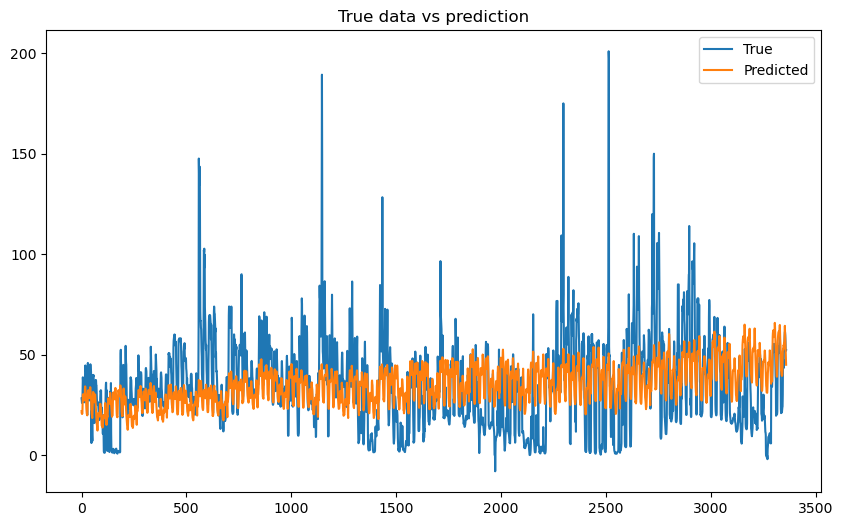

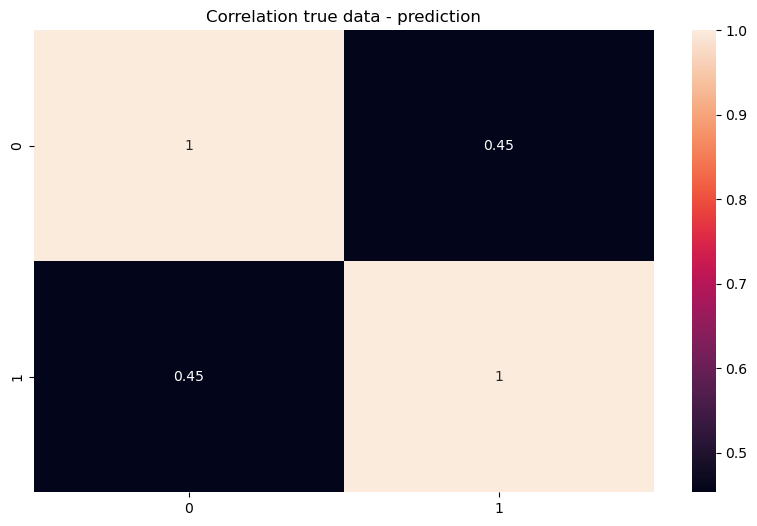

	r^2=0.204786
Mean Absolute Error (MAE): 14.800410381305277
Mean Squared Error (MSE): 382.6830398439949
Root Mean Squared Error (RMSE): 19.56228616097809
Mean Absolute Percentage Error (MAPE): 228.42
Accuracy: -128.42
Iteration  1
train 2021-01-01 00:00:00 - 2021-06-29 23:00:00, test 2021-06-30 00:00:00 - 2021-07-31 23:00:00


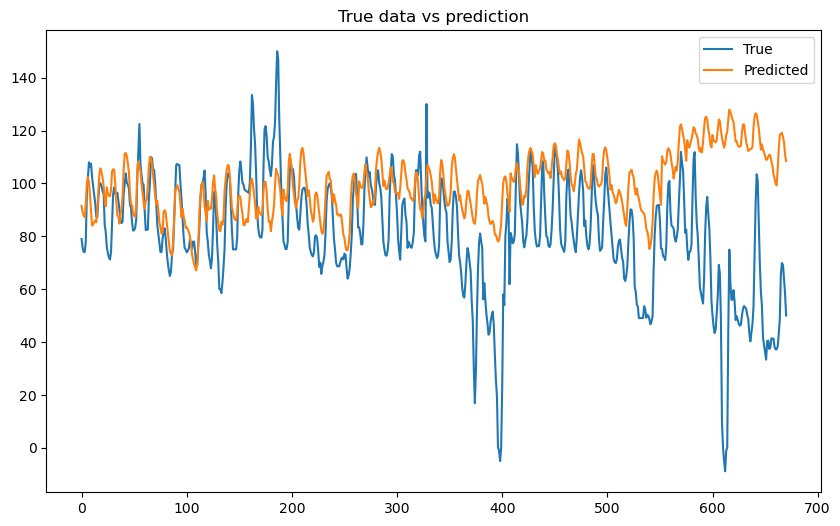

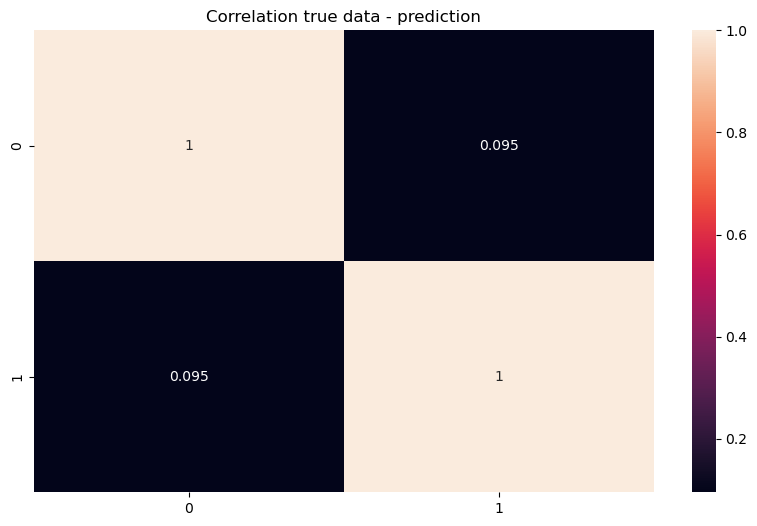

	r^2=-0.903293
Mean Absolute Error (MAE): 22.403308485114444
Mean Squared Error (MSE): 935.3936197901422
Root Mean Squared Error (RMSE): 30.58420539739658
Mean Absolute Percentage Error (MAPE): 1893.37
Accuracy: -1793.37
Iteration  2
train 2021-08-01 00:00:00 - 2023-01-12 23:00:00, test 2023-01-13 00:00:00 - 2023-04-15 23:00:00


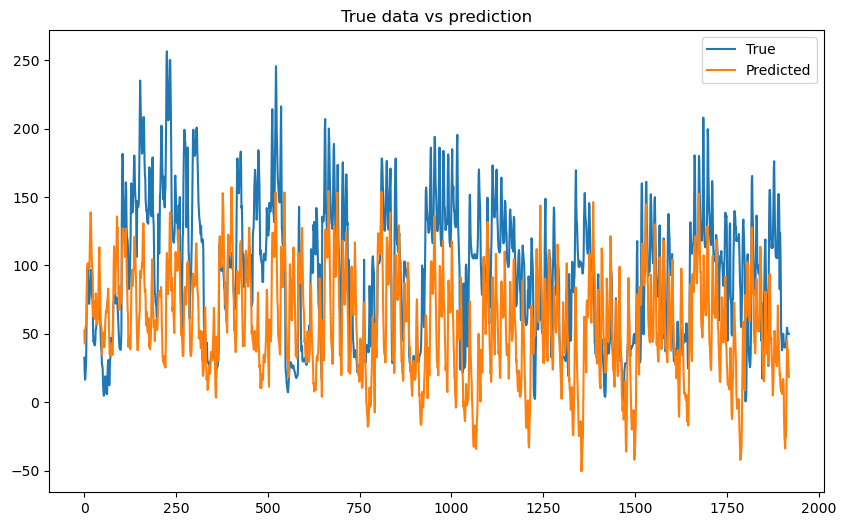

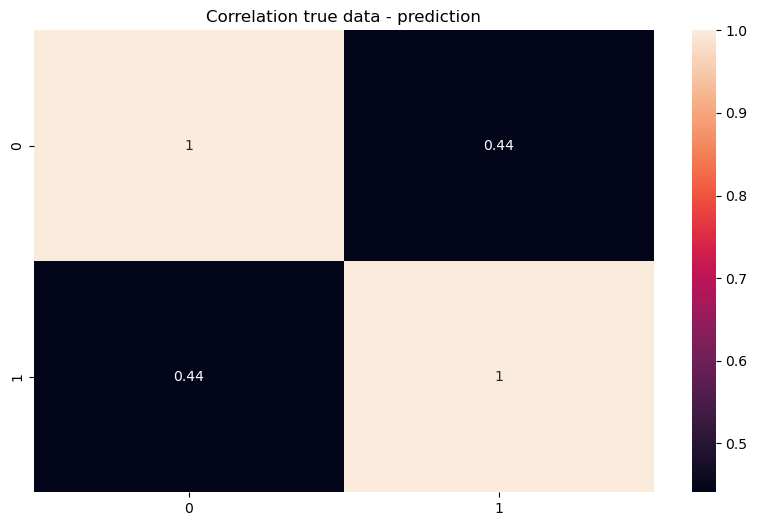

	r^2=-0.509662
Mean Absolute Error (MAE): 49.54584579228025
Mean Squared Error (MSE): 3706.9572901870747
Root Mean Squared Error (RMSE): 60.884787017670305
Mean Absolute Percentage Error (MAPE): 76.82
Accuracy: 23.18


In [32]:
lr_pred_0, lr_model_0 = run_model('lr', df_lagged, k_folds, split_method,
                                         train_start, features, target, cols_std)




In [33]:
lr_model_0

[{'copy_X': True,
  'fit_intercept': True,
  'n_jobs': None,
  'normalize': 'deprecated',
  'positive': False},
 {'copy_X': True,
  'fit_intercept': True,
  'n_jobs': None,
  'normalize': 'deprecated',
  'positive': False},
 {'copy_X': True,
  'fit_intercept': True,
  'n_jobs': None,
  'normalize': 'deprecated',
  'positive': False}]

### Random Forest

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


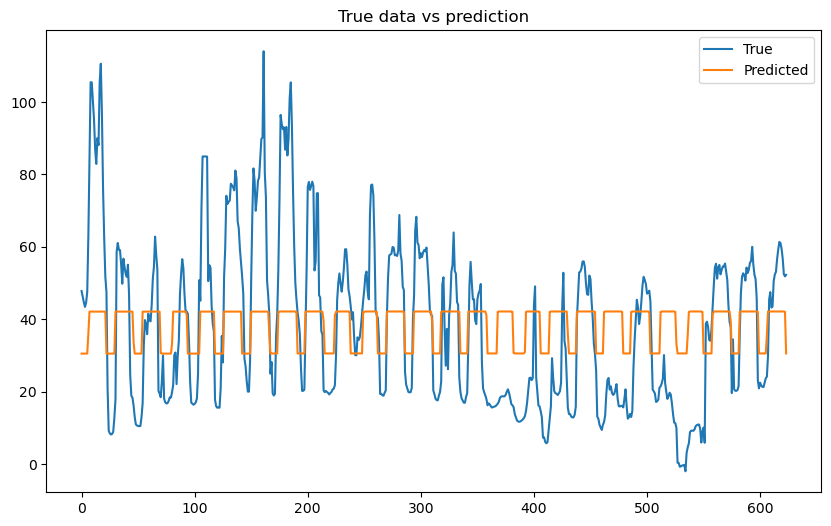

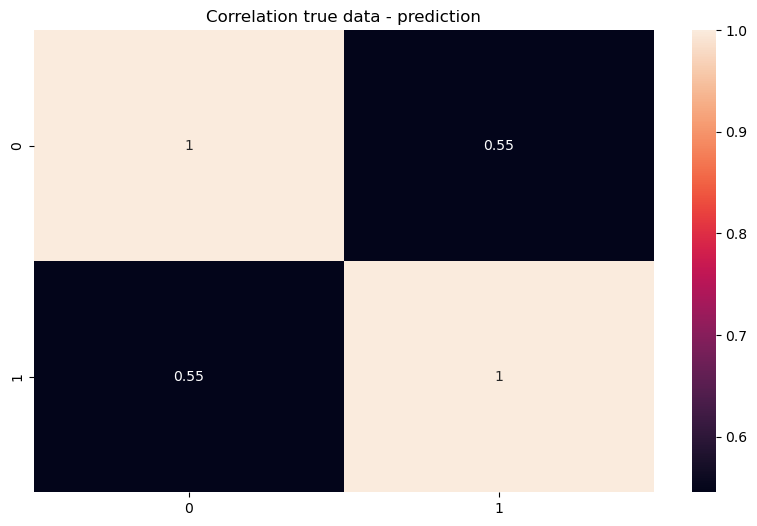

	r^2=0.202312
Mean Absolute Error (MAE): 16.78817244571623
Mean Squared Error (MSE): 424.403560311406
Root Mean Squared Error (RMSE): 20.601057261980657
Mean Absolute Percentage Error (MAPE): 168.02
Accuracy: -68.02
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


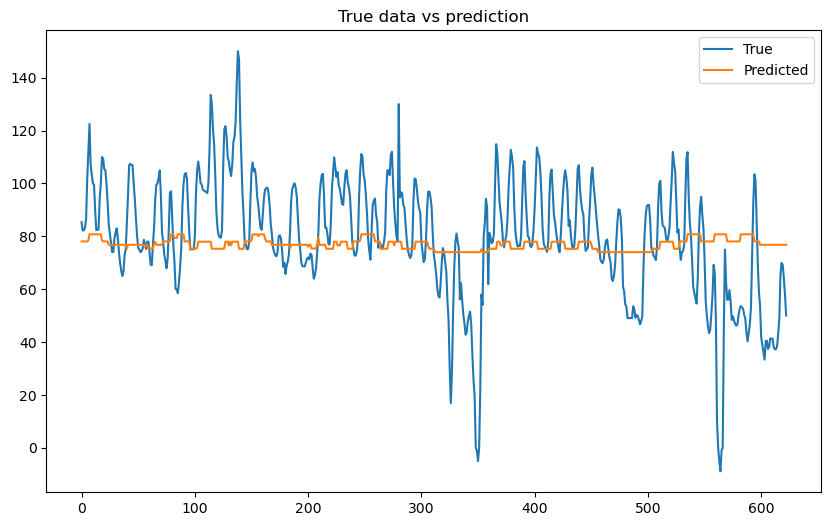

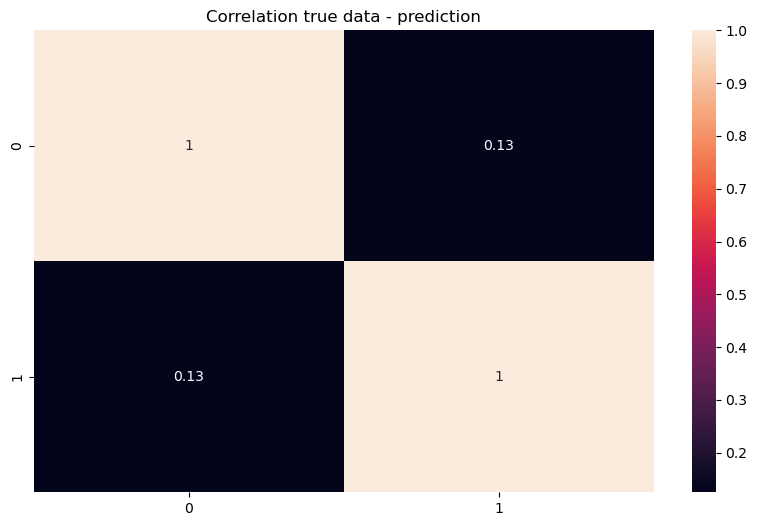

	r^2=0.000144
Mean Absolute Error (MAE): 16.93197635633668
Mean Squared Error (MSE): 511.7384274829417
Root Mean Squared Error (RMSE): 22.62163626891171
Mean Absolute Percentage Error (MAPE): 1689.82
Accuracy: -1589.82
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00


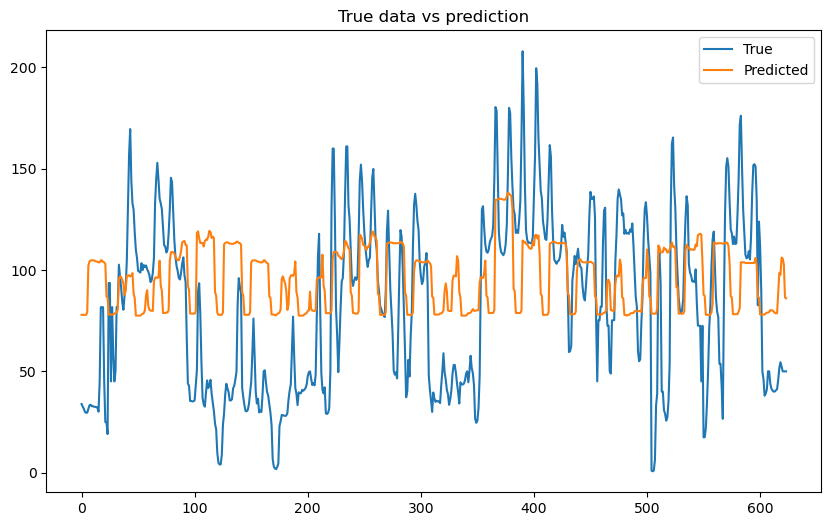

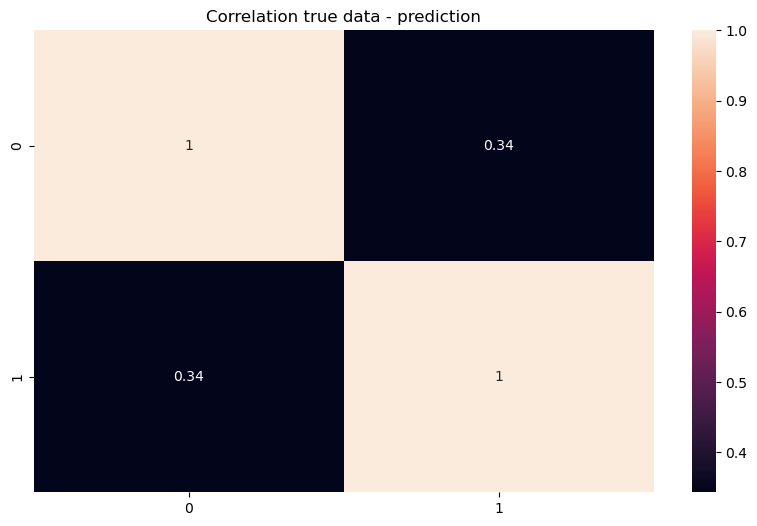

	r^2=0.025062
Mean Absolute Error (MAE): 35.186058414601305
Mean Squared Error (MSE): 1741.824924302671
Root Mean Squared Error (RMSE): 41.73517610245189
Mean Absolute Percentage Error (MAPE): 143.71
Accuracy: -43.71


In [49]:
rf_pred_0, rf_models_0 = run_model('rf', df_lagged, k_folds, split_method, train_start, features, target, cols_std)

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


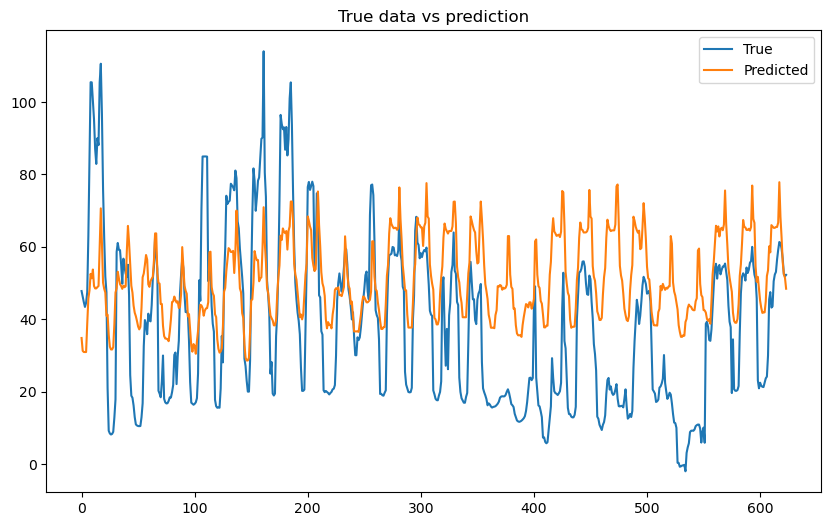

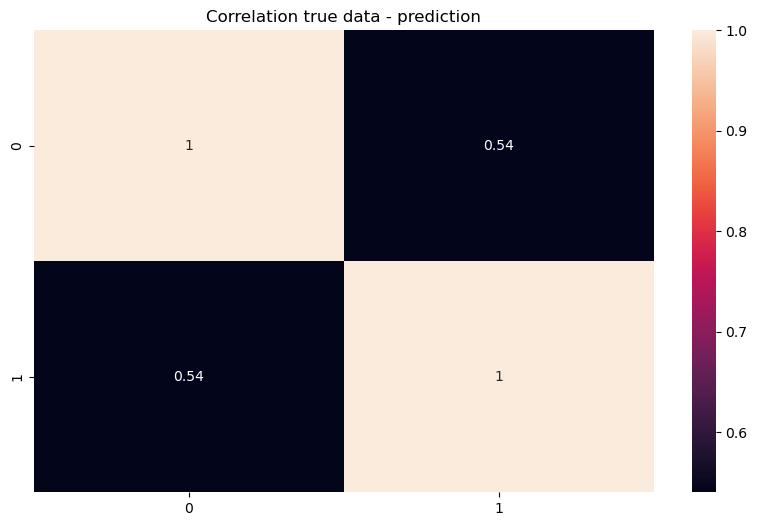

	r^2=-0.017825
Mean Absolute Error (MAE): 19.694030393441057
Mean Squared Error (MSE): 541.5258487409262
Root Mean Squared Error (RMSE): 23.270707955301365
Mean Absolute Percentage Error (MAPE): 214.18
Accuracy: -114.18
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


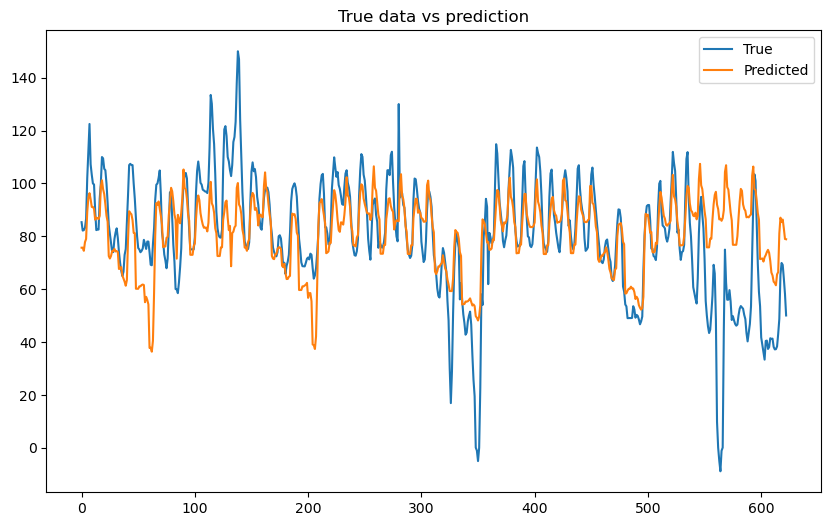

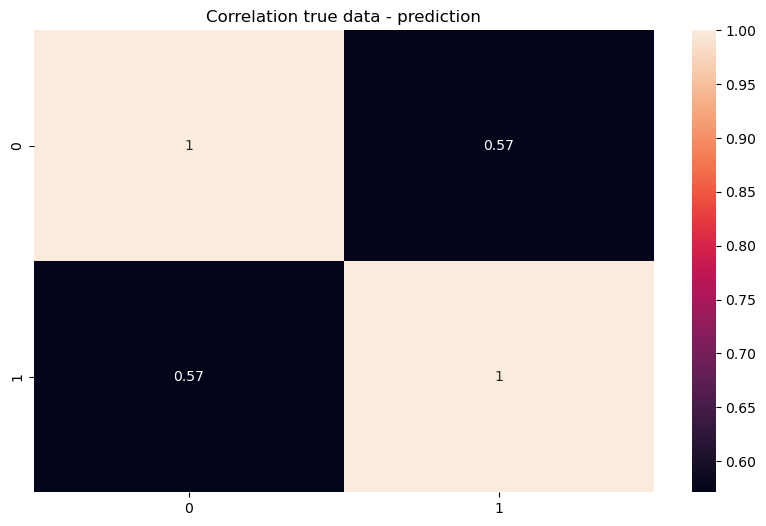

	r^2=0.322398
Mean Absolute Error (MAE): 12.76349345902944
Mean Squared Error (MSE): 346.8049674913593
Root Mean Squared Error (RMSE): 18.622700327593723
Mean Absolute Percentage Error (MAPE): 1285.26
Accuracy: -1185.26
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00


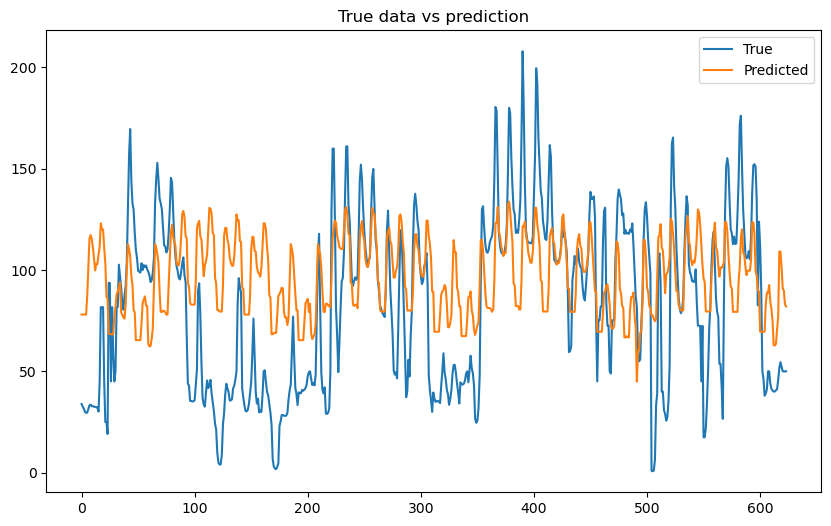

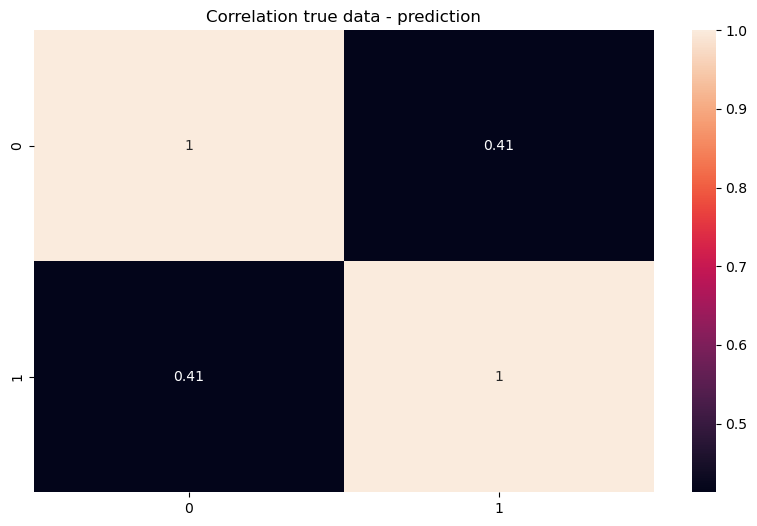

	r^2=0.073102
Mean Absolute Error (MAE): 33.81165462557855
Mean Squared Error (MSE): 1655.9961436977542
Root Mean Squared Error (RMSE): 40.69393251699514
Mean Absolute Percentage Error (MAPE): 139.3
Accuracy: -39.3


In [43]:
gb_pred_0, gb_models_0 = run_model('gb', df_lagged, k_folds, split_method, train_start, features, target, cols_std,'long term')

### XGBoost

Iteration  0
train 2018-01-09 00:00:00 - 2020-07-21 23:00:00, test 2020-07-22 00:00:00 - 2020-12-31 23:00:00


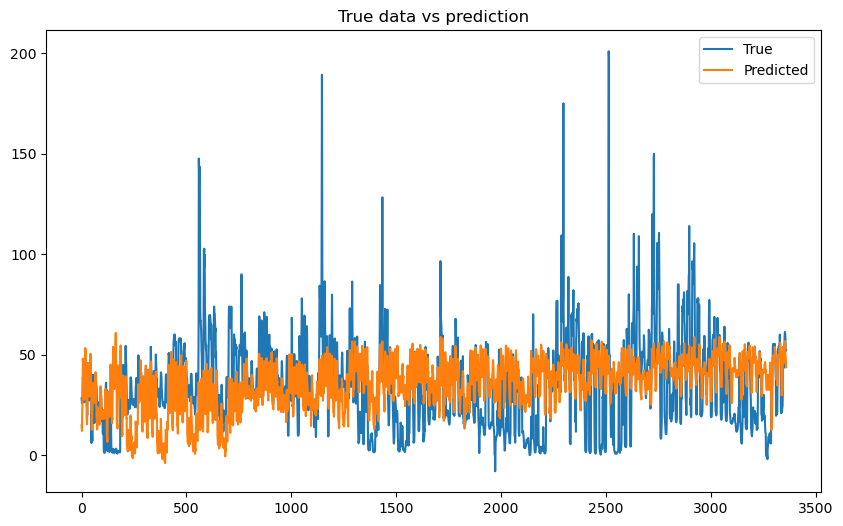

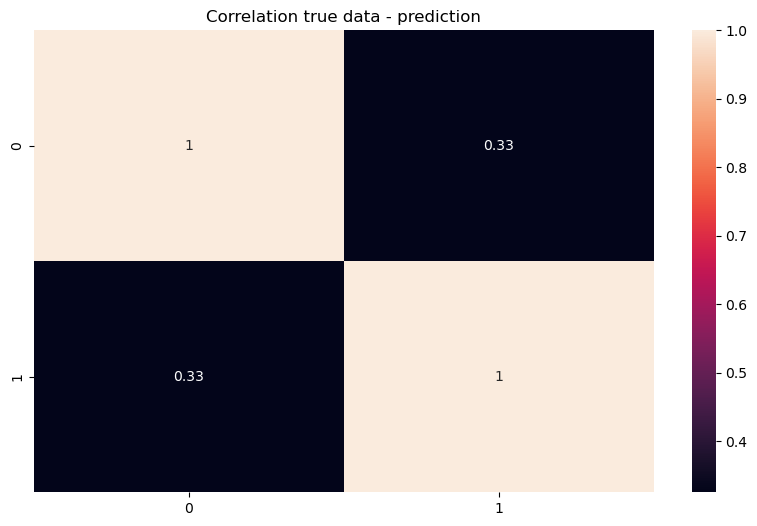

	r^2=0.056343
Mean Absolute Error (MAE): 16.272632933920338
Mean Squared Error (MSE): 454.1185429038454
Root Mean Squared Error (RMSE): 21.31005731817363
Mean Absolute Percentage Error (MAPE): 247.76
Accuracy: -147.76
Iteration  1
train 2021-01-01 00:00:00 - 2021-06-29 23:00:00, test 2021-06-30 00:00:00 - 2021-07-31 23:00:00


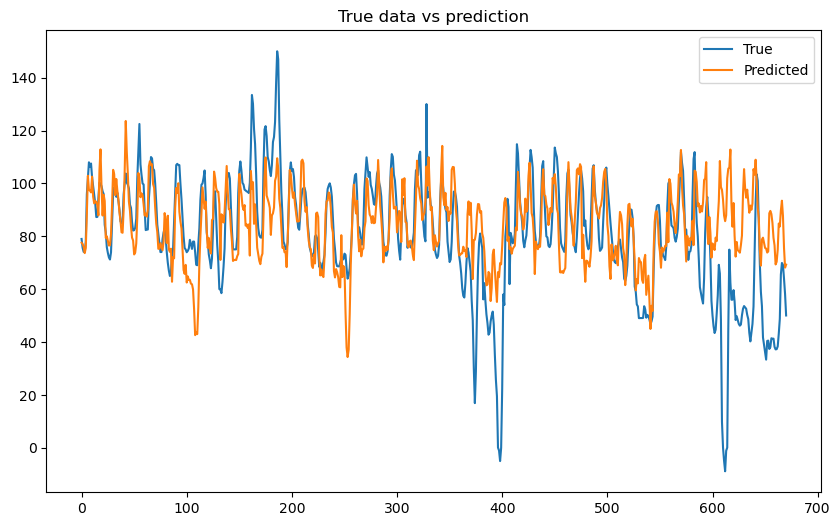

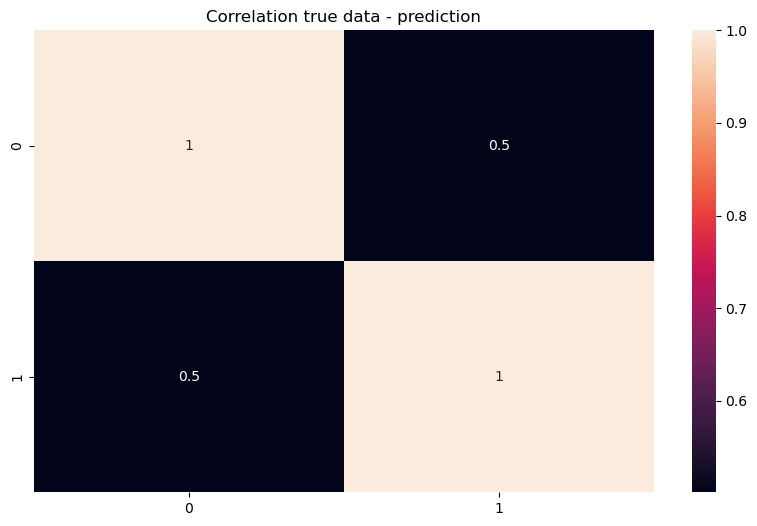

	r^2=0.208600
Mean Absolute Error (MAE): 13.35312376178679
Mean Squared Error (MSE): 388.94187441245924
Root Mean Squared Error (RMSE): 19.721609326129023
Mean Absolute Percentage Error (MAPE): 1550.2
Accuracy: -1450.2
Iteration  2
train 2021-08-01 00:00:00 - 2023-01-12 23:00:00, test 2023-01-13 00:00:00 - 2023-04-15 23:00:00


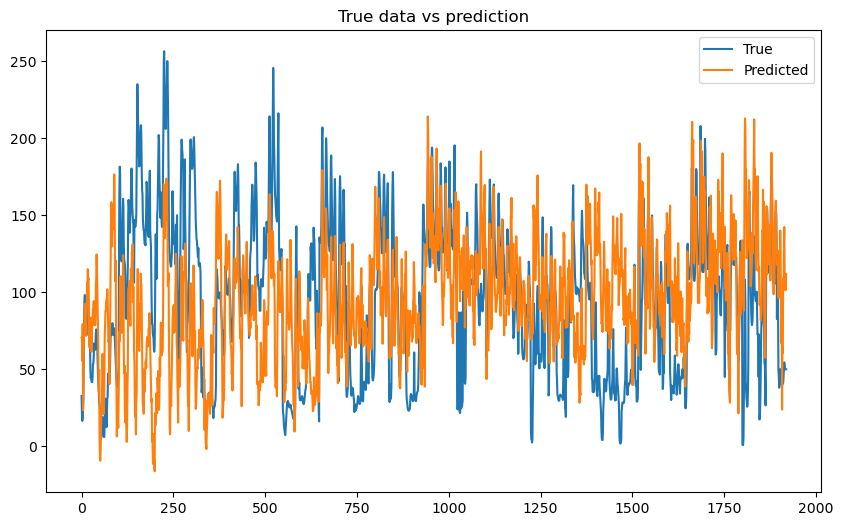

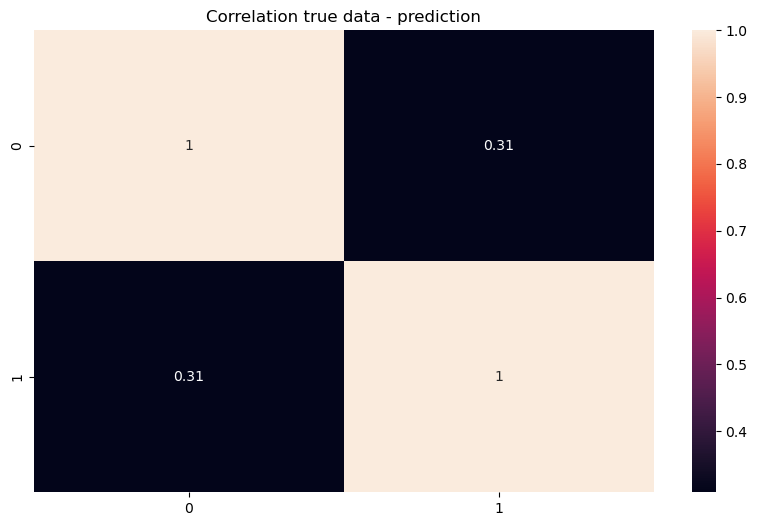

	r^2=-0.112294
Mean Absolute Error (MAE): 42.568918977372356
Mean Squared Error (MSE): 2731.224474985494
Root Mean Squared Error (RMSE): 52.26111819494005
Mean Absolute Percentage Error (MAPE): 106.63
Accuracy: -6.63


In [40]:
xgb_pred_0, xgb_models_0 = run_model('xgb', df_lagged, k_folds, split_method, train_start, features, target, cols_std,'long term')

## Split - Method = 1
The approach is to split the data in increasing blocks. The size of the train set increases, whereas the size of the test remains 3 months.

In [50]:
split_method = 1

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


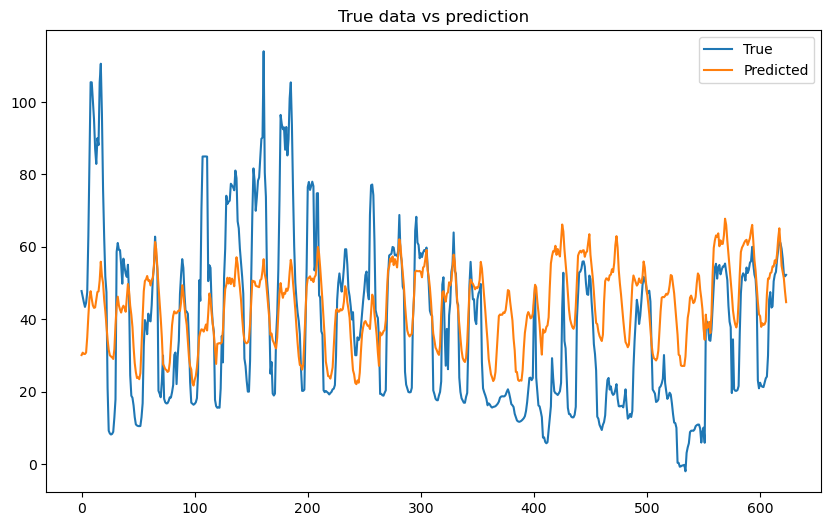

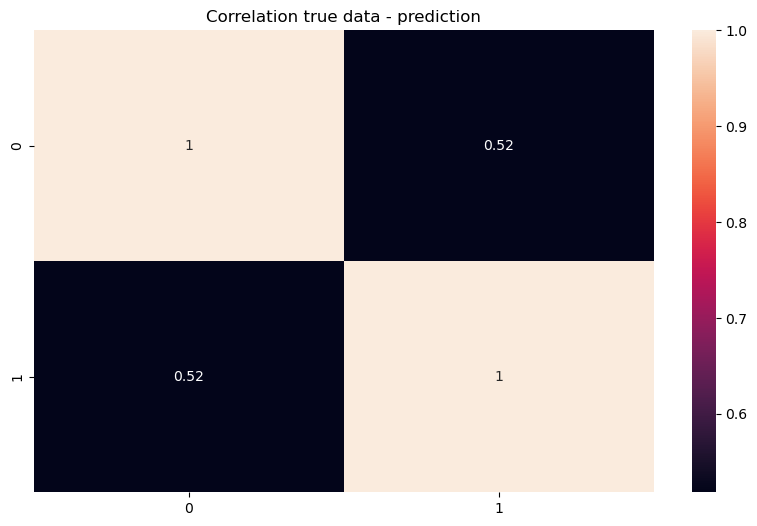

	r^2=0.205084
Mean Absolute Error (MAE): 16.52241190844902
Mean Squared Error (MSE): 422.9290097332413
Root Mean Squared Error (RMSE): 20.565237896344435
Mean Absolute Percentage Error (MAPE): 169.14
Accuracy: -69.14
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


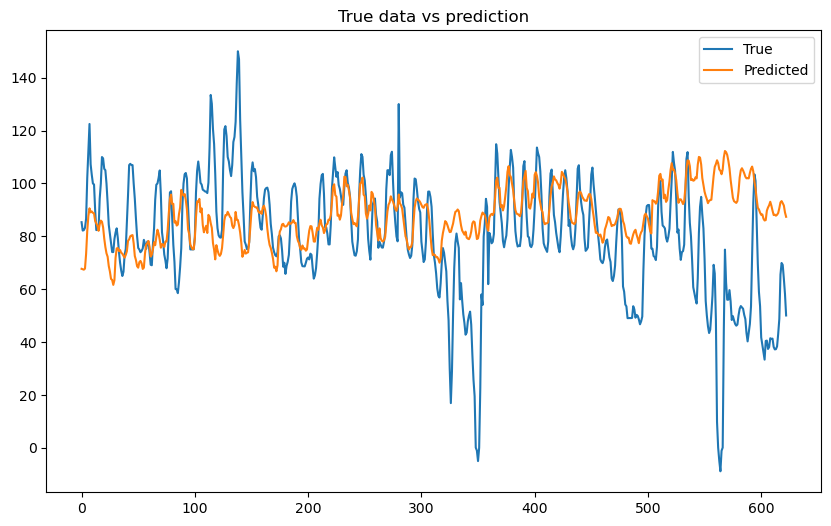

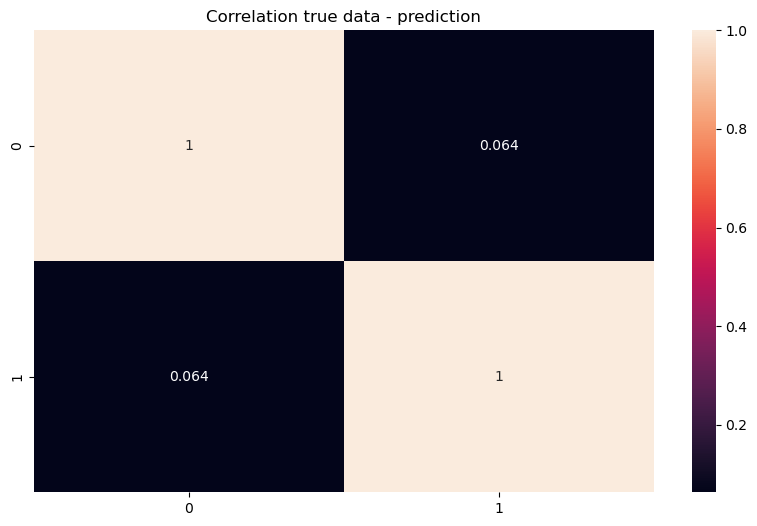

	r^2=-0.258808
Mean Absolute Error (MAE): 17.860673859093794
Mean Squared Error (MSE): 644.2733288432345
Root Mean Squared Error (RMSE): 25.38253984224657
Mean Absolute Percentage Error (MAPE): 1938.08
Accuracy: -1838.08
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00


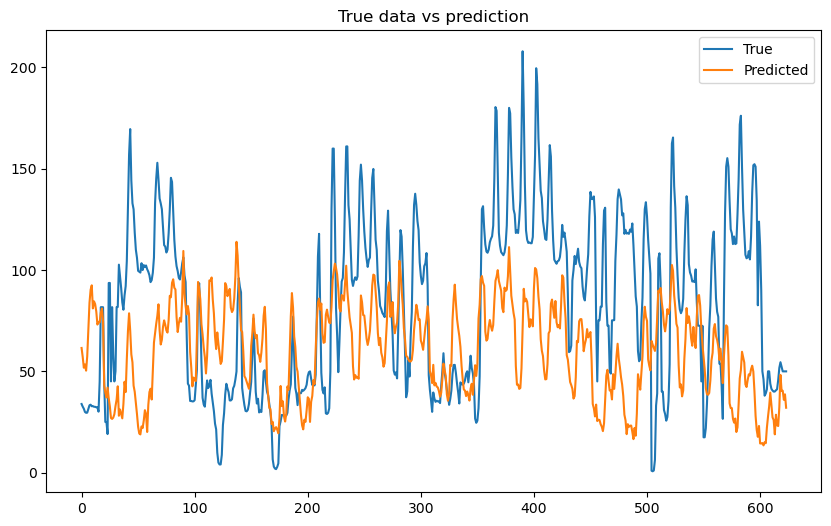

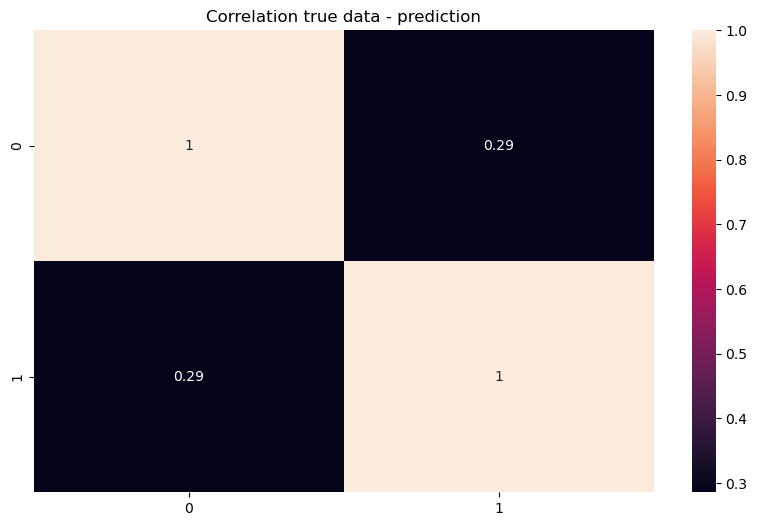

	r^2=-0.266680
Mean Absolute Error (MAE): 39.05729162581439
Mean Squared Error (MSE): 2263.05147006617
Root Mean Squared Error (RMSE): 47.57154054753924
Mean Absolute Percentage Error (MAPE): 96.83
Accuracy: 3.17


In [51]:
lr_pred_1, lr_model_1 = run_model('lr', df_lagged, k_folds, split_method,
                                         train_start, features, target, cols_std)

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


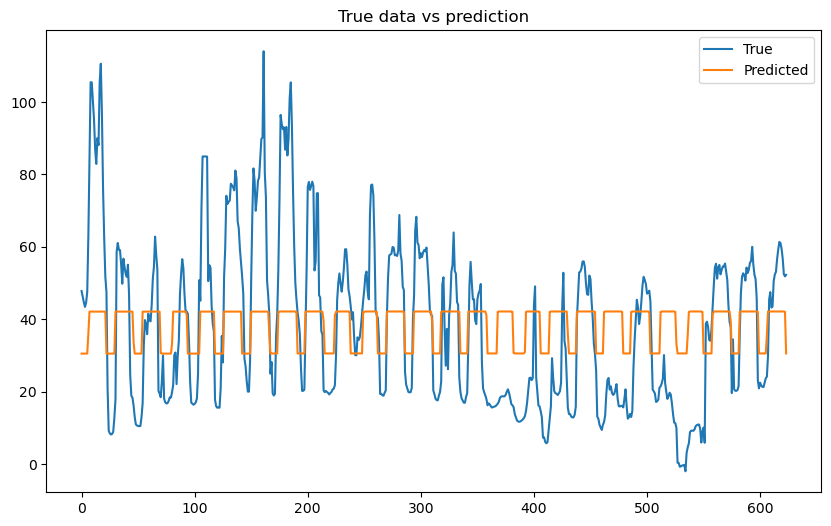

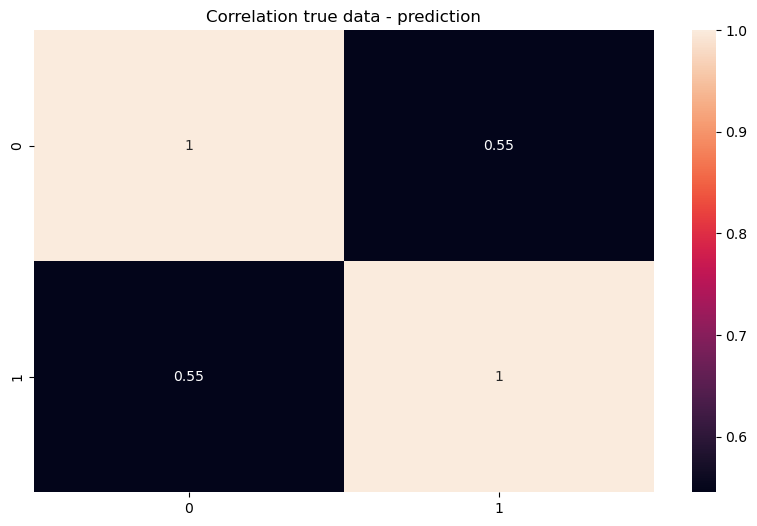

	r^2=0.202312
Mean Absolute Error (MAE): 16.78817244571623
Mean Squared Error (MSE): 424.403560311406
Root Mean Squared Error (RMSE): 20.601057261980657
Mean Absolute Percentage Error (MAPE): 168.02
Accuracy: -68.02
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


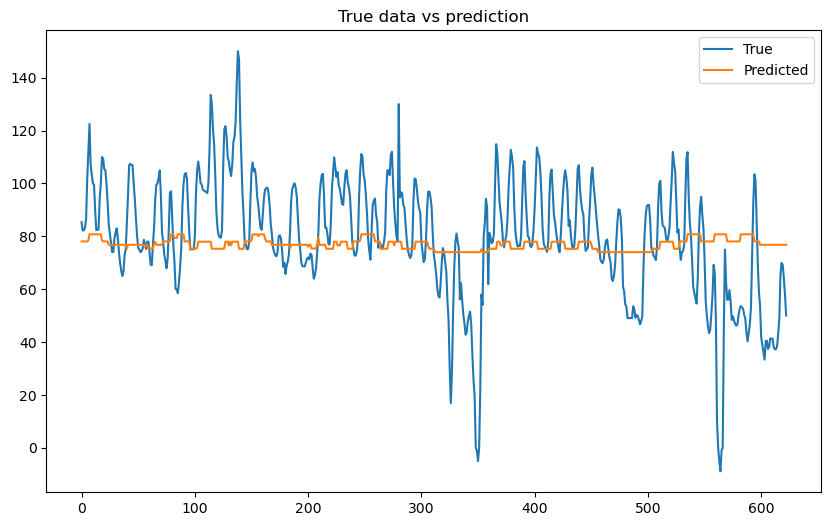

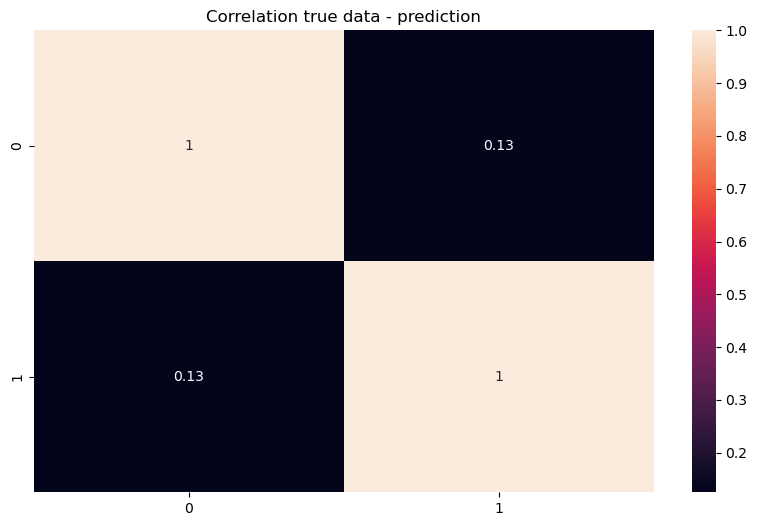

	r^2=0.000144
Mean Absolute Error (MAE): 16.93197635633668
Mean Squared Error (MSE): 511.7384274829417
Root Mean Squared Error (RMSE): 22.62163626891171
Mean Absolute Percentage Error (MAPE): 1689.82
Accuracy: -1589.82
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00


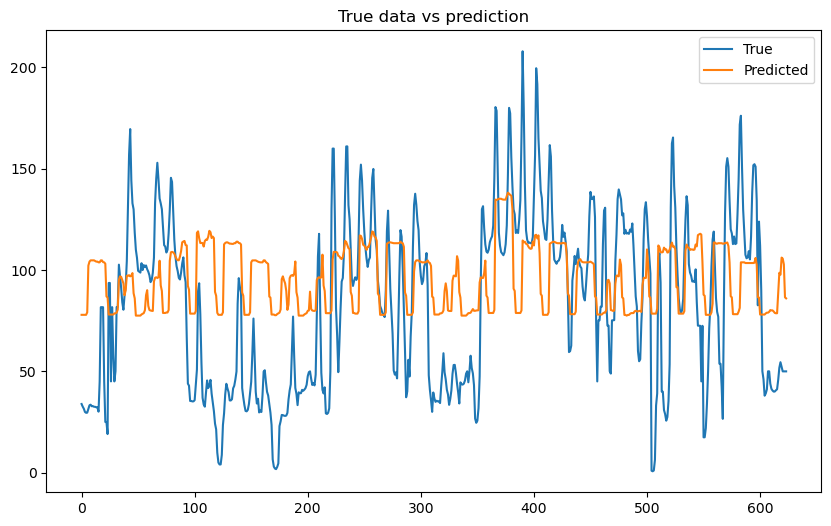

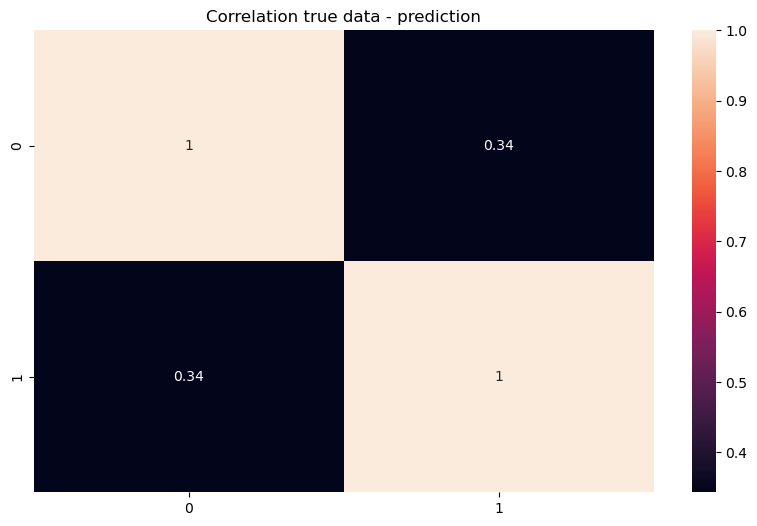

	r^2=0.025053
Mean Absolute Error (MAE): 35.18630438710094
Mean Squared Error (MSE): 1741.8410364628503
Root Mean Squared Error (RMSE): 41.735369130545024
Mean Absolute Percentage Error (MAPE): 143.71
Accuracy: -43.71


In [52]:
rf_pred_1, rf_models_1 = run_model('rf', df_lagged, k_folds, split_method, train_start, features, target, cols_std,X_std=False)

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


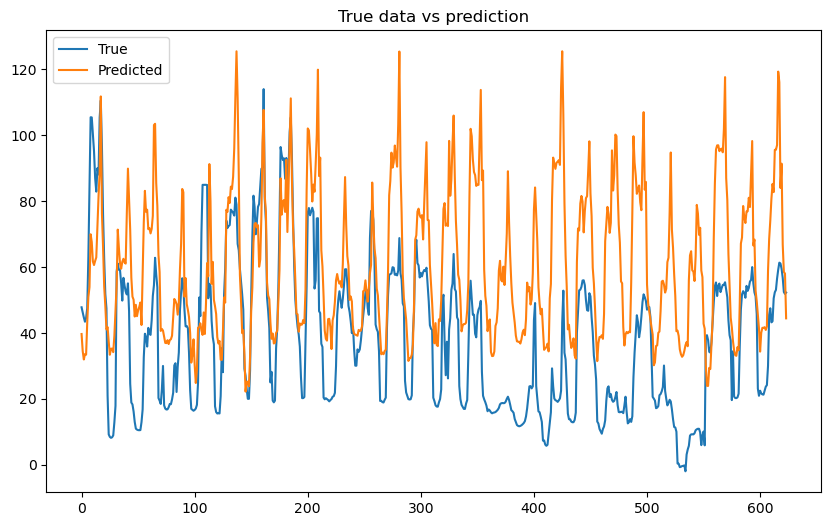

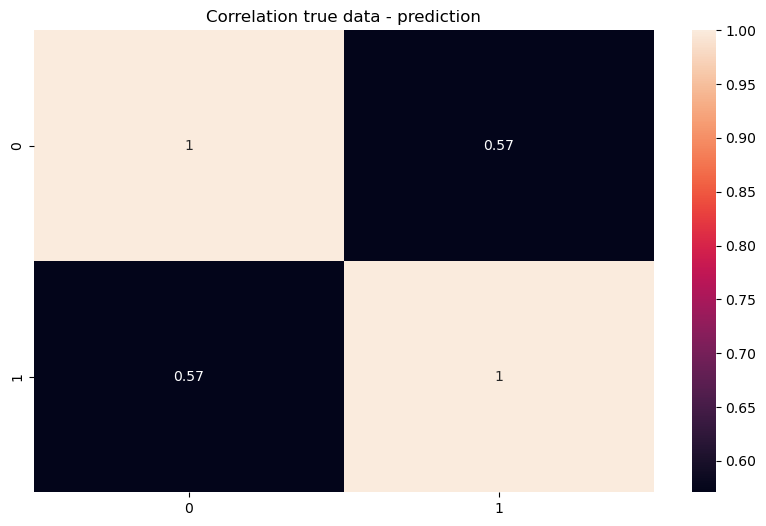

	r^2=-0.779168
Mean Absolute Error (MAE): 25.72464485474122
Mean Squared Error (MSE): 946.5924359395527
Root Mean Squared Error (RMSE): 30.76674236801083
Mean Absolute Percentage Error (MAPE): 229.99
Accuracy: -129.99
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


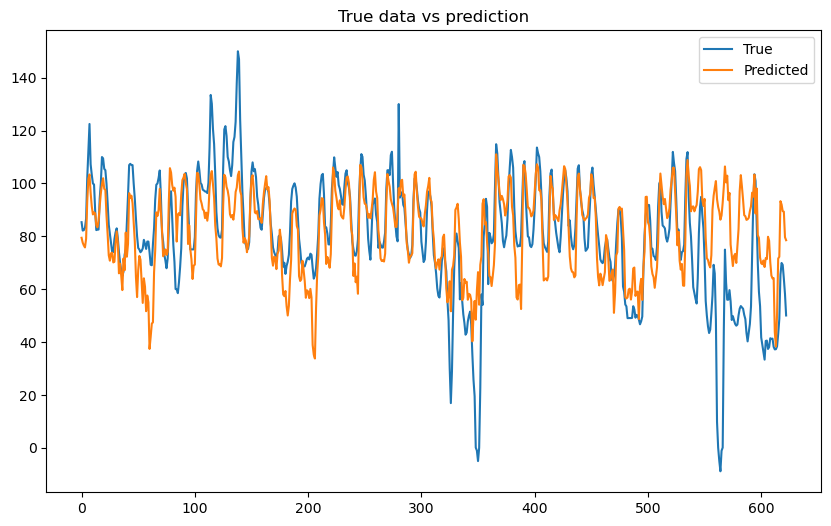

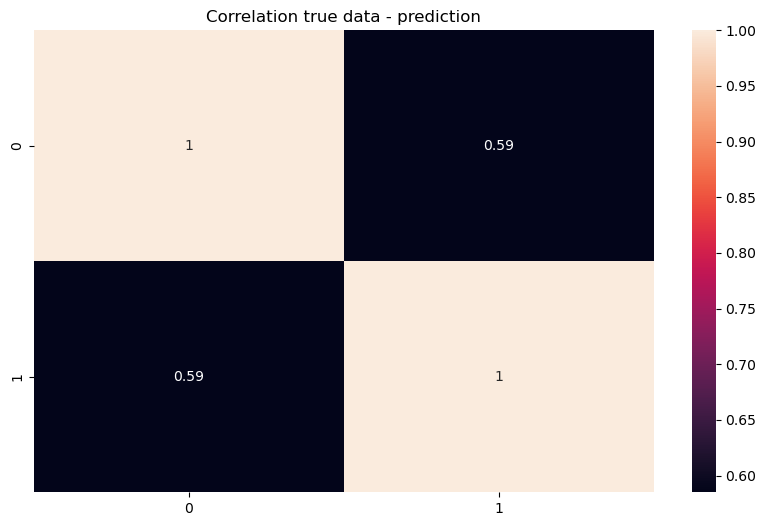

	r^2=0.323039
Mean Absolute Error (MAE): 12.927689907998564
Mean Squared Error (MSE): 346.4770121309075
Root Mean Squared Error (RMSE): 18.613892986984414
Mean Absolute Percentage Error (MAPE): 1369.58
Accuracy: -1269.58
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00


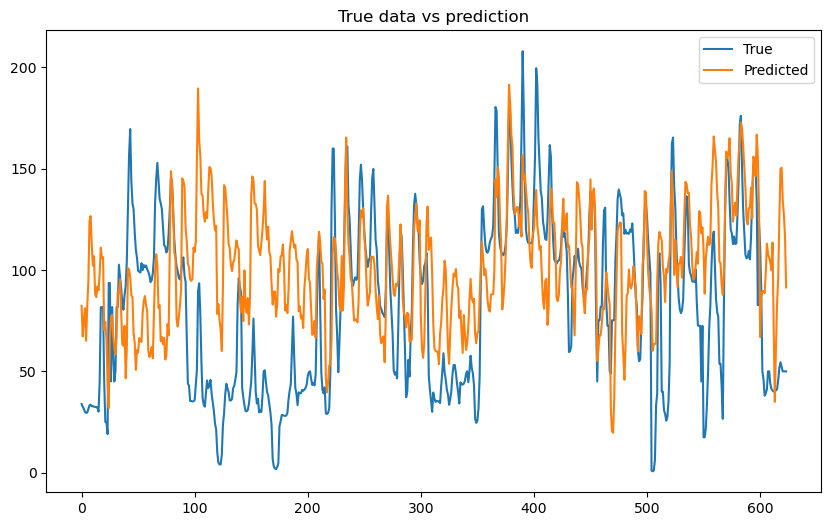

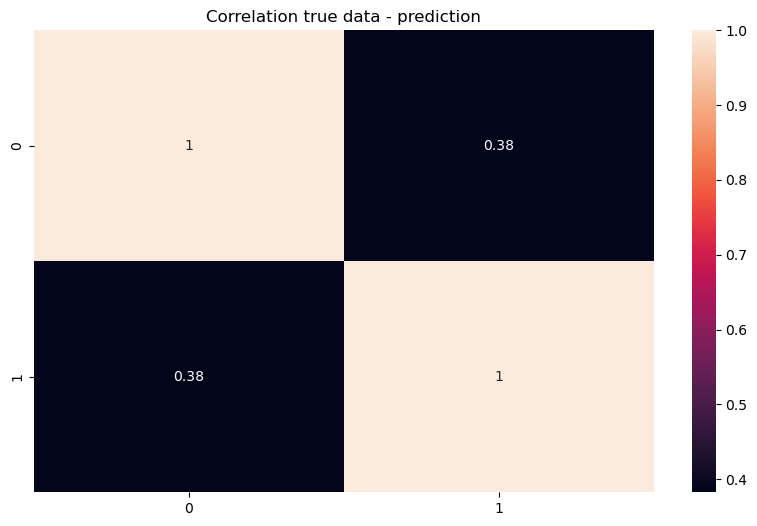

	r^2=-0.126985
Mean Absolute Error (MAE): 36.517580434725836
Mean Squared Error (MSE): 2013.4724907338182
Root Mean Squared Error (RMSE): 44.87173376117551
Mean Absolute Percentage Error (MAPE): 143.36
Accuracy: -43.36


In [53]:
xgb_pred_1, xgb_models_1 = run_model('xgb', df_lagged, k_folds, split_method, train_start, features, target, cols_std,X_std=False)

# Long term

Selection of features for exogenous indicators

In [54]:
cols_std = ['DK_1_imports', 'SE_4_imports', 'DK_1_exports',
            'SE_4_exports', 'Forecasted_Load', 'Actual_Load',
             'ttf_price', 'coal_price', 'co2_price',
            'DE_LU_AT_imports', 'DE_LU_AT_exports', 'Wind Total'] 

features = cols_std + ['Quarter', 'Month', 'Year', 'Weekday', 'Hour', 'Week', 'business']

Arima without exogenous factors

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                25560
Model:                 ARIMA(8, 0, 1)   Log Likelihood              -81072.656
Date:                Tue, 25 Apr 2023   AIC                         162167.312
Time:                        14:57:35   BIC                         162256.948
Sample:                             0   HQIC                        162196.294
                              - 25560                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.1610      1.563     24.408      0.000      35.097      41.225
ar.L1          2.1191 

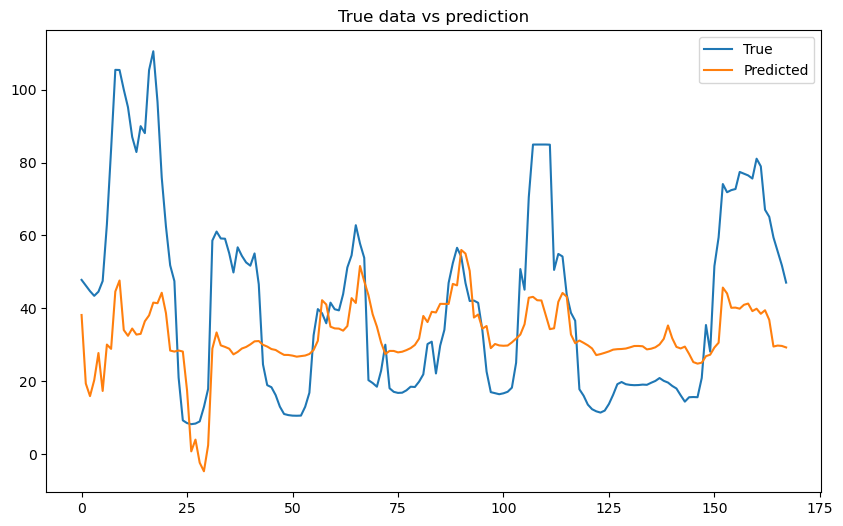

Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                30647
Model:                 ARIMA(8, 0, 1)   Log Likelihood             -100206.805
Date:                Tue, 25 Apr 2023   AIC                         200435.610
Time:                        14:58:13   BIC                         200527.243
Sample:                             0   HQIC                        200464.982
                              - 30647                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.5622      1.654     24.525      0.000      37.321      43.804
ar.L1          2.1305 

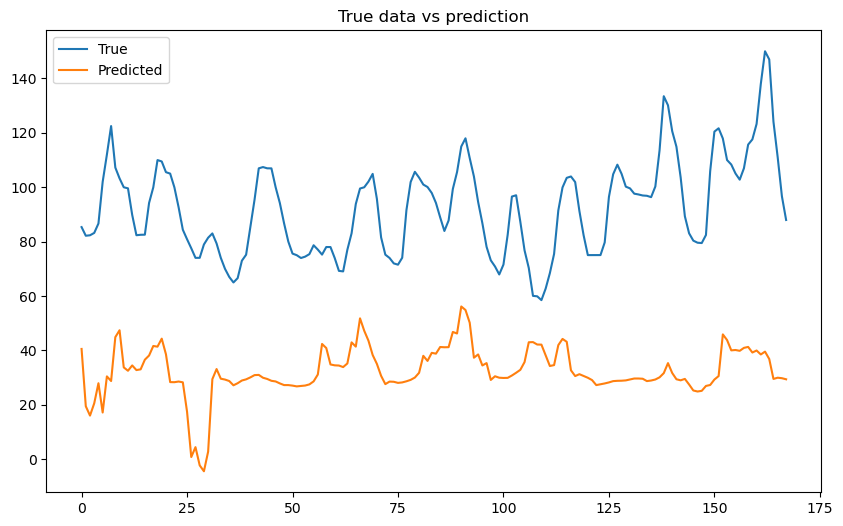

Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                45598
Model:                 ARIMA(8, 0, 1)   Log Likelihood             -193512.785
Date:                Tue, 25 Apr 2023   AIC                         387047.569
Time:                        14:58:57   BIC                         387143.573
Sample:                             0   HQIC                        387077.771
                              - 45598                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.2198     10.638      7.823      0.000      62.370     104.070
ar.L1          1.7065 

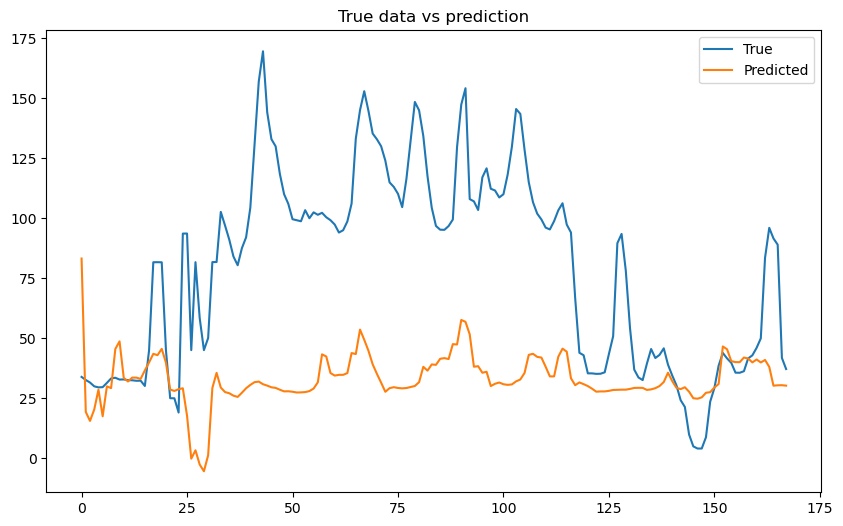

In [61]:
ypred, models=run_time_model('arima', df_clean, k_folds, split_method,train_start, features, target,168,exog=None)

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                25560
Model:                 ARIMA(8, 0, 1)   Log Likelihood              -81072.656
Date:                Tue, 25 Apr 2023   AIC                         162167.312
Time:                        14:59:32   BIC                         162256.948
Sample:                             0   HQIC                        162196.294
                              - 25560                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.1610      1.563     24.408      0.000      35.097      41.225
ar.L1          2.1191 

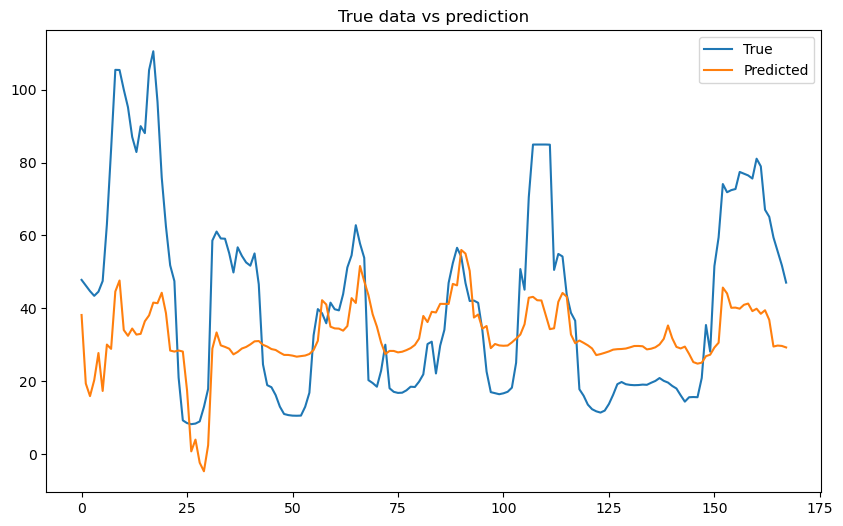

Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                30647
Model:                 ARIMA(8, 0, 1)   Log Likelihood             -100206.805
Date:                Tue, 25 Apr 2023   AIC                         200435.610
Time:                        15:00:09   BIC                         200527.243
Sample:                             0   HQIC                        200464.982
                              - 30647                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.5622      1.654     24.525      0.000      37.321      43.804
ar.L1          2.1305 

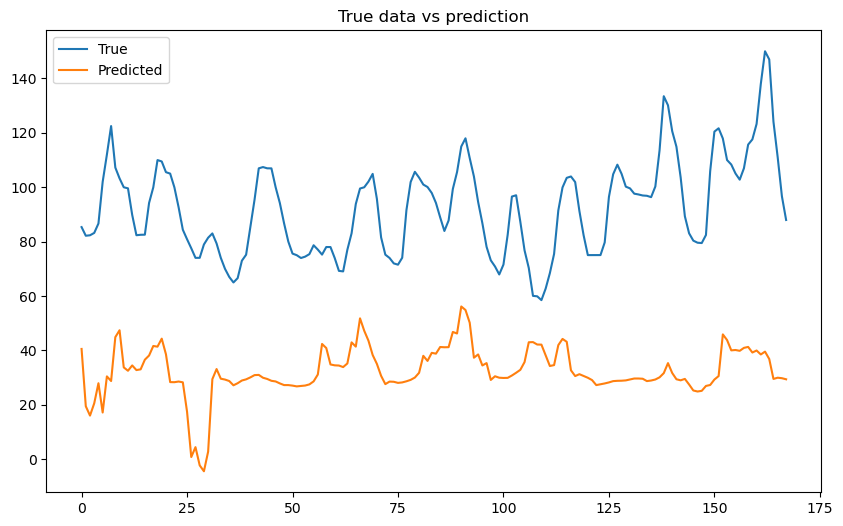

Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                45598
Model:                 ARIMA(8, 0, 1)   Log Likelihood             -193512.785
Date:                Tue, 25 Apr 2023   AIC                         387047.569
Time:                        15:00:53   BIC                         387143.573
Sample:                             0   HQIC                        387077.771
                              - 45598                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.2198     10.638      7.823      0.000      62.370     104.070
ar.L1          1.7065 

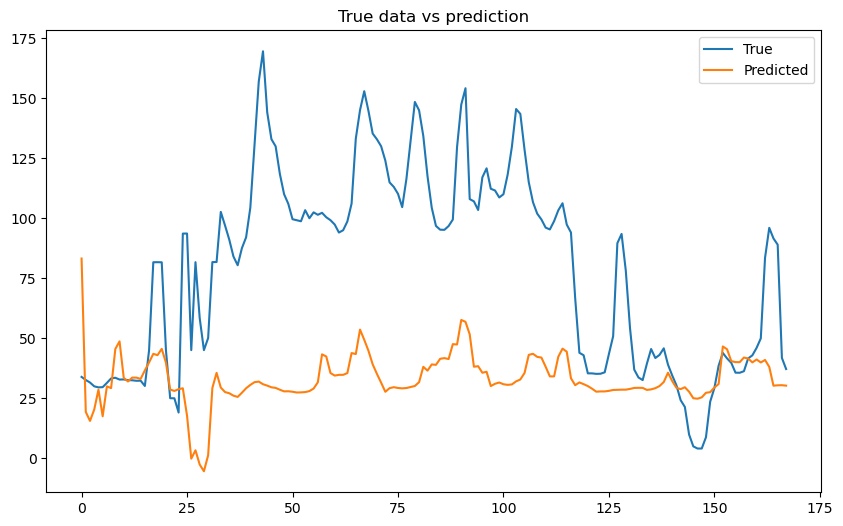

In [62]:

ypred, models=run_time_model('arima', df_clean, k_folds, split_method,train_start, features, target,168)

Ridge autoregressor

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


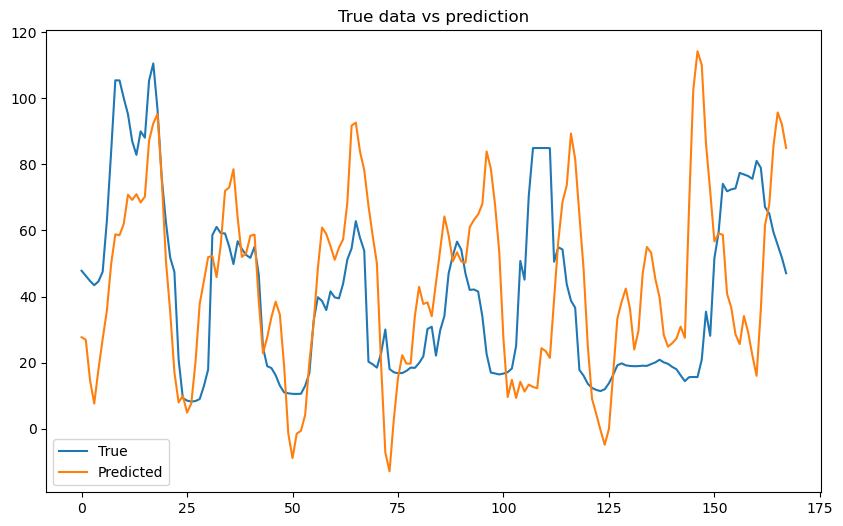

Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


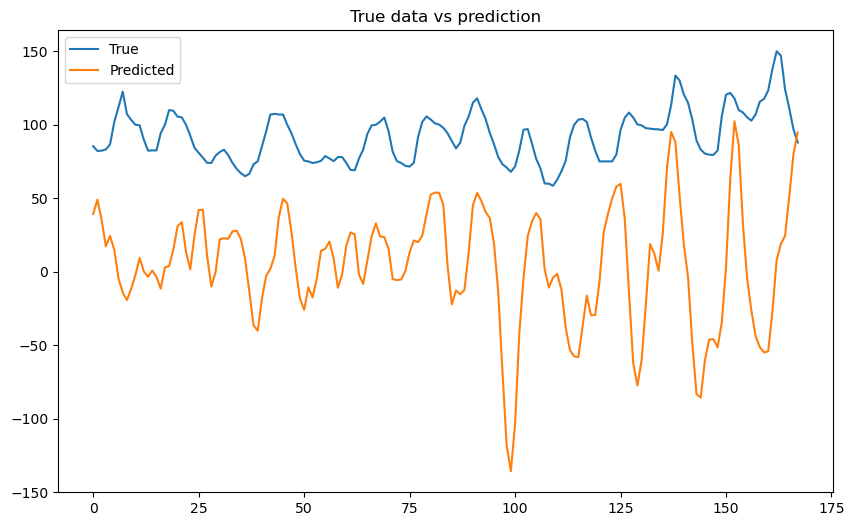

Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00


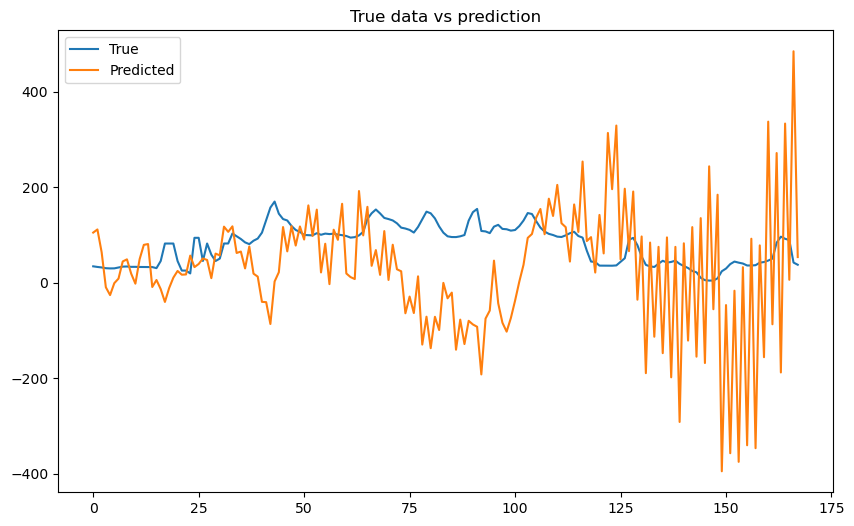

In [86]:
ypred, models=run_time_model('far', df_clean, k_folds, split_method,train_start, features, target,168,exog=None)

Ridge autoregressor with exogenous factors

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


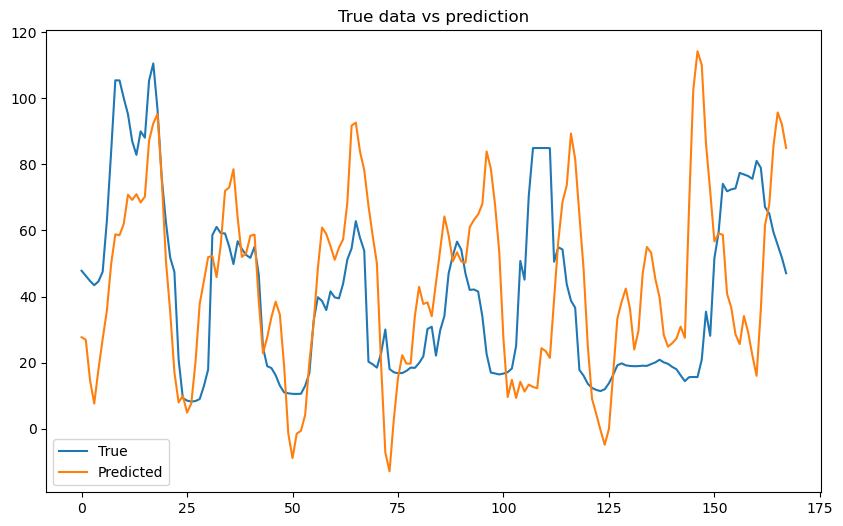

Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


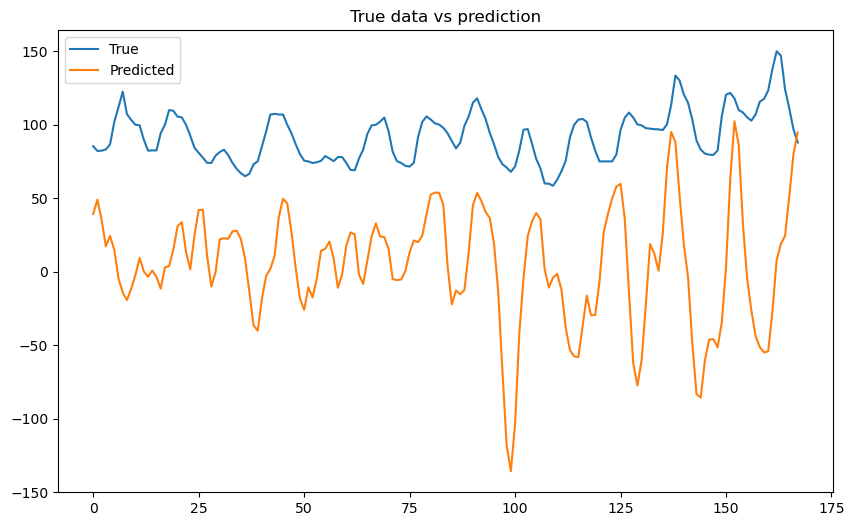

Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00


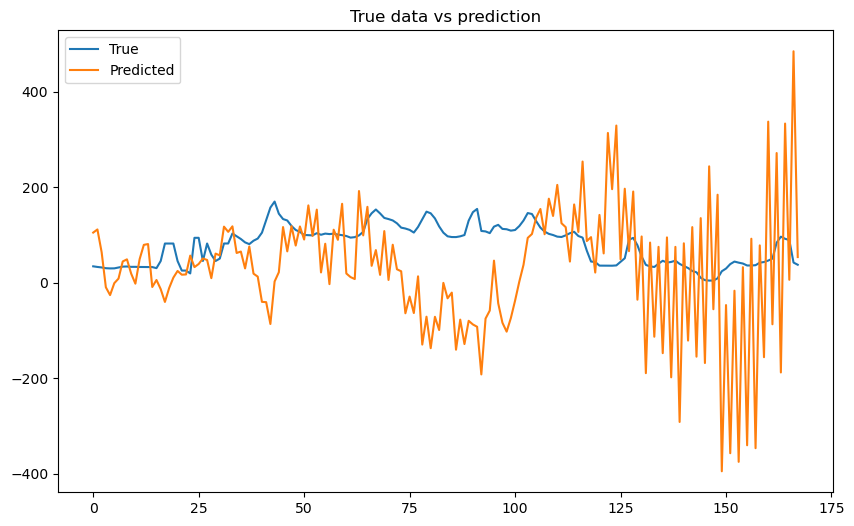

In [64]:
ypred, models=run_time_model('far', df_clean, k_folds, split_method,train_start, features, target,168)